In [1]:
!python --version

Python 3.9.2


In [2]:
%pip install numpy==2.0.2 -q
%pip install opencv-python==4.10.0.84 -q
%pip install imutils==0.5.4 -1
%pip install matplotlib==3.9.2 -q
%pip install pandas==2.2.3 -q
%pip install scikit-learn==1.5.2 -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Usage:   
  /home/miguelzanchettin/Documentos/Repositório GIT/TecherCBIR/.venv/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /home/miguelzanchettin/Documentos/Repositório GIT/TecherCBIR/.venv/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /home/miguelzanchettin/Documentos/Repositório GIT/TecherCBIR/.venv/bin/python -m pip install [options] [-e] <vcs project url> ...
  /home/miguelzanchettin/Documentos/Repositório GIT/TecherCBIR/.venv/bin/python -m pip install [options] [-e] <local project path> ...
  /home/miguelzanchettin/Documentos/Repositório GIT/TecherCBIR/.venv/bin/python -m pip install [options] <archive url/path> ...

no such option: -1
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated package

In [37]:

import os

import cv2
import imutils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier


### Explicação conceitual

In [4]:
os.path.isfile(os.path.join('images', '101100023.bmp'))


True

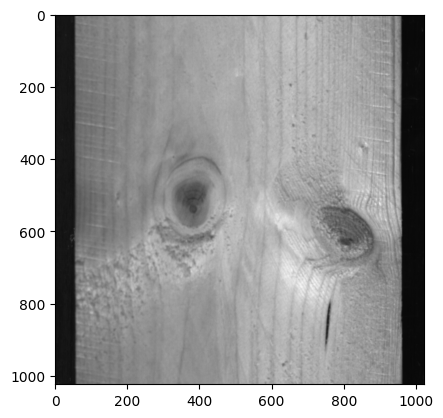

In [5]:

img = cv2.imread('images/101100023.bmp')
plt.imshow(img)


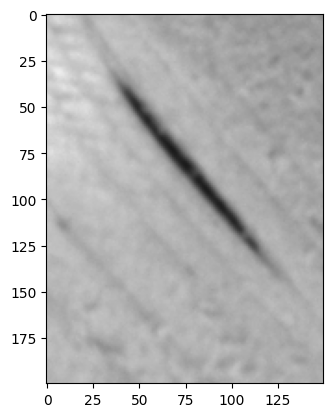

In [6]:

# Rotaciona a imagem em 45 graus
crop_img = imutils.rotate(img, 45)

# Seleciona apenas risco
crop_img = crop_img[500:700, 850:1000]

# Mostra imagem
plt.imshow(crop_img)


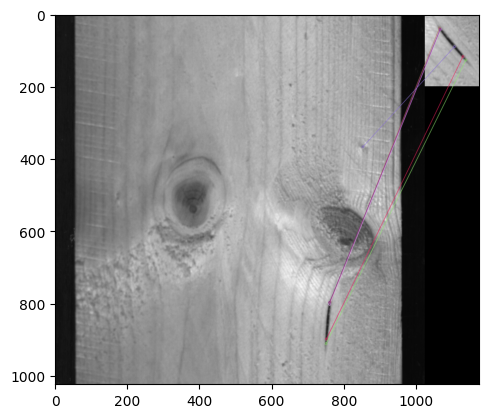

In [7]:

# Cria matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Cria ORB
orb = cv2.ORB_create()

# Aplica ORB nas imagens
kp1, desc1 = orb.detectAndCompute(img,None)
kp2, desc2 = orb.detectAndCompute(crop_img,None)

# Calcula match nos descritores
matches = bf.match(desc1, desc2)

# Ordena por distancia
matches = sorted(matches, key = lambda x:x.distance)

# Desenha matches na imagem
img3 = cv2.drawMatches(img, kp1, crop_img, kp2, matches[:10], None, flags=2)

plt.imshow(img3)
plt.show()


# Replicação para mais imagens

In [29]:

img_paths = [os.path.join('images', _) for _ in os.listdir('images')]
img_descs = pd.DataFrame()

for img_path in img_paths:
    img = cv2.imread(img_path)
    _, desc =  orb.detectAndCompute(img, None)
    df = pd.DataFrame(desc)
    df['path'] = img_path
    img_descs = pd.concat([img_descs, df], axis=0)


img_descs.reset_index(inplace=True)
img_descs


[ERROR:0@325.079] global loadsave.cpp:480 imread_ imread_('images/101100035.bmp'): can't read data: OpenCV(4.10.0) /io/opencv/modules/imgcodecs/src/bitstrm.cpp:110: error: (-2:Unspecified error) Unexpected end of input stream in function 'readBlock'

[ERROR:0@325.108] global loadsave.cpp:480 imread_ imread_('images/100200014.bmp'): can't read data: OpenCV(4.10.0) /io/opencv/modules/imgcodecs/src/bitstrm.cpp:110: error: (-2:Unspecified error) Unexpected end of input stream in function 'readBlock'

[ERROR:0@325.390] global loadsave.cpp:480 imread_ imread_('images/101100028.bmp'): can't read data: OpenCV(4.10.0) /io/opencv/modules/imgcodecs/src/bitstrm.cpp:110: error: (-2:Unspecified error) Unexpected end of input stream in function 'readBlock'



,index,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,path
0,0,64.0,182.0,184.0,123.0,250.0,233.0,17.0,159.0,58.0,...,115.0,206.0,151.0,61.0,255.0,132.0,64.0,143.0,251.0,images/101100012.bmp
1,1,26.0,89.0,123.0,238.0,87.0,210.0,182.0,101.0,196.0,...,239.0,243.0,109.0,170.0,131.0,53.0,14.0,53.0,255.0,images/101100012.bmp
2,2,22.0,143.0,86.0,222.0,150.0,162.0,191.0,226.0,157.0,...,255.0,176.0,166.0,203.0,131.0,55.0,239.0,37.0,173.0,images/101100012.bmp
3,3,16.0,145.0,30.0,191.0,146.0,198.0,25.0,37.0,174.0,...,53.0,233.0,227.0,26.0,65.0,16.0,2.0,165.0,26.0,images/101100012.bmp
4,4,96.0,183.0,184.0,122.0,248.0,233.0,17.0,159.0,154.0,...,51.0,79.0,149.0,53.0,255.0,208.0,64.0,135.0,235.0,images/101100012.bmp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20404,228,88.0,143.0,4.0,37.0,146.0,67.0,70.0,175.0,54.0,...,31.0,168.0,231.0,173.0,85.0,162.0,192.0,140.0,40.0,images/100200012.bmp
20405,229,109.0,99.0,250.0,71.0,98.0,58.0,234.0,152.0,104.0,...,72.0,6.0,173.0,37.0,132.0,229.0,243.0,75.0,133.0,images/100200012.bmp
20406,230,154.0,26.0,30.0,183.0,50.0,155.0,58.0,112.0,156.0,...,255.0,198.0,211.0,122.0,147.0,28.0,143.0,9.0,27.0,images/100200012.bmp
20407,231,121.0,88.0,235.0,229.0,100.0,46.0,107.0,16.0,113.0,...,136.0,215.0,235.0,227.0,128.0,47.0,169.0,114.0,241.0,images/100200012.bmp


In [68]:
cols = [_ for _ in img_descs.columns if type(_) == int]
X = np.array(img_descs[cols])
print(f'Antes da transformação: {X.shape}')

kmeans = KMeans(n_clusters=6)
X #= kmeans.fit_transform(X)
print(f'Depois da transformação: {X.shape}')


Antes da transformação: (20409, 32)
Depois da transformação: (20409, 32)


In [67]:

_, desc =  orb.detectAndCompute(crop_img, None)
desired_X = desc #= kmeans.transform(desc)



In [69]:

knn = KNeighborsClassifier()
knn.fit(X, y=img_descs['path'])


KNeighborsClassifier()

In [73]:

imgs = pd.DataFrame(knn.predict_proba(desired_X), columns=knn.classes_).sum().sort_values(ascending=False)
imgs[:10]

images/101100023.bmp    3.6
images/100400029.bmp    1.4
images/100700039.bmp    1.2
images/101100039.bmp    1.2
images/100700084.bmp    0.6
images/100400021.bmp    0.6
images/101100047.bmp    0.6
images/101100051.bmp    0.6
images/100500078.bmp    0.4
images/100500052.bmp    0.4
dtype: float64

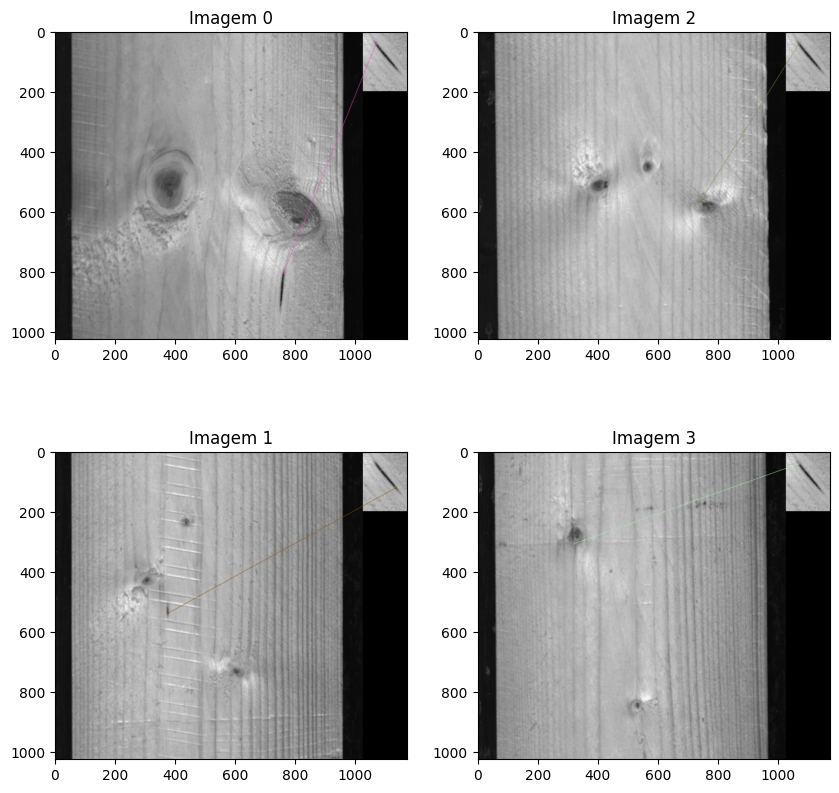

In [113]:
row = 2
col = 2

fig, axes = plt.subplots(row, col, figsize=(10, 10))

c = 0
for j in range(col):
    for i in range(row):
        
        img = cv2.imread(imgs.index[c])
        kp1, desc1 = orb.detectAndCompute(img,None)
        kp2, desc2 = orb.detectAndCompute(crop_img,None)

        # Calcula match nos descritores
        matches = bf.match(desc1, desc2)

        # Ordena por distancia
        matches = sorted(matches, key = lambda x:x.distance)

        # Desenha matches na imagem
        img3 = cv2.drawMatches(img, kp1, crop_img, kp2, matches[:1], None, flags=2)

        axes[i, j].imshow(img3)
        axes[i, j].set_title(f'Imagem {c}')
        c += 1
